In [ ]:
#==============================================================================
#Check key word "Notes" for important notes
#==============================================================================

#initiate codes here
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import visualkeras
import read_data_tensorflow as read_data
import threading
import tqdm.notebook as tqdm
%matplotlib inline

config = tf.compat.v1.ConfigProto(gpu_options=tf.compat.v1.GPUOptions(allow_growth=True))
sess = tf.compat.v1.Session(config=config)

#############################################
#load data, fashion MNIST
org_train_images, train_labels, test_images, test_labels = read_data.load_fashion_mnist_dataset()

#load data, MNIST
#org_train_images, train_labels, test_images, test_labels = read_data.load_mnist_dataset()

train_images = np.expand_dims(org_train_images, 3) #train x
train_images = train_images.astype(np.float32)
org_train_images = org_train_images.astype(np.float32)
test_images = np.expand_dims(test_images, 3)       #test x
test_images = test_images.astype(np.float32)

train_labels = train_labels.astype(np.float32)     #train y
test_labels = test_labels.astype(np.float32)       #test y

#normalize all data
train_images = train_images /255.0
test_images = test_images   /255.0


In [ ]:
#take one image
image_idx = 1
image_0 = train_images[image_idx].copy()
#add padding on left
plt.imshow(image_0)
plt.show()

image_1 = np.pad(image_0, ((1,0),(1,0),(0,0)), 'constant', constant_values=0)
print(image_1.shape)
plt.imshow(image_1, cmap='gray')
plt.show()

image_0 = np.pad(image_0, ((0,1),(0,1),(0,0)), 'constant', constant_values=0)
minus_characterize = image_1 - image_0

plt.imshow(minus_characterize, cmap='gray')
#print mean, max, min, std
print("mean: ", np.mean(minus_characterize))
print("max: ", np.max(minus_characterize))
print("min: ", np.min(minus_characterize))
print("std: ", np.std(minus_characterize))
plt.show()

#img_diff is the image of difference between two pixels
img_diff = train_images[image_idx].copy()

for i in range(0, 28):
    for j in range(0, 28):
        if i == 0 and j == 0:
            img_diff[i][j] = train_images[image_idx][i][j] + abs(train_images[image_idx][i][j+1] - train_images[image_idx][i][j]) + abs(train_images[image_idx][i+1][j] - train_images[image_idx][i][j])
        elif i == 0 and j == 27:
            img_diff[i][j] = train_images[image_idx][i][j] + abs(train_images[image_idx][i][j-1] - train_images[image_idx][i][j]) + abs(train_images[image_idx][i+1][j] - train_images[image_idx][i][j])
        elif i == 27 and j == 0:
            img_diff[i][j] = train_images[image_idx][i][j] + abs(train_images[image_idx][i][j+1] - train_images[image_idx][i][j]) + abs(train_images[image_idx][i-1][j] - train_images[image_idx][i][j])
        elif i == 27 and j == 27:
            img_diff[i][j] = train_images[image_idx][i][j] + abs(train_images[image_idx][i][j-1] - train_images[image_idx][i][j]) + abs(train_images[image_idx][i-1][j] - train_images[image_idx][i][j])
        elif i == 0:
            img_diff[i][j] = train_images[image_idx][i][j] + abs(train_images[image_idx][i][j-1] - train_images[image_idx][i][j]) + abs(train_images[image_idx][i][j+1] - train_images[image_idx][i][j]) + abs(train_images[image_idx][i+1][j] - train_images[image_idx][i][j])
        elif i == 27:
            img_diff[i][j] = train_images[image_idx][i][j] + abs(train_images[image_idx][i][j-1] - train_images[image_idx][i][j]) + abs(train_images[image_idx][i][j+1] - train_images[image_idx][i][j]) + abs(train_images[image_idx][i-1][j] - train_images[image_idx][i][j])
        elif j == 0:
            img_diff[i][j] = train_images[image_idx][i][j] + abs(train_images[image_idx][i-1][j] - train_images[image_idx][i][j]) + abs(train_images[image_idx][i+1][j] - train_images[image_idx][i][j]) + abs(train_images[image_idx][i][j+1] - train_images[image_idx][i][j])
        elif j == 27:
            img_diff[i][j] = train_images[image_idx][i][j] + abs(train_images[image_idx][i-1][j] - train_images[image_idx][i][j]) + abs(train_images[image_idx][i+1][j] - train_images[image_idx][i][j]) + abs(train_images[image_idx][i][j-1] - train_images[image_idx][i][j])
        else:
            img_diff[i][j] = train_images[image_idx][i][j] + abs(train_images[image_idx][i-1][j] - train_images[image_idx][i][j]) + abs(train_images[image_idx][i+1][j] - train_images[image_idx][i][j]) + abs(train_images[image_idx][i][j-1] - train_images[image_idx][i][j]) + abs(train_images[image_idx][i][j+1] - train_images[image_idx][i][j])

plt.imshow(img_diff, cmap='gray')
print("mean: ", np.mean(img_diff))


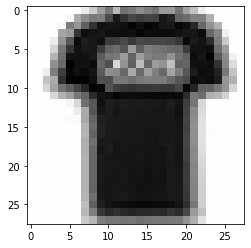

In [3]:
gradient_img = train_images[image_idx].copy()

conv_calc_kernel = tf.keras.layers.Conv2D(filters=1, kernel_size=(3,3), strides=(1,1), padding='same', activation=None, input_shape=(28,28,1))
init_img = train_images[image_idx].copy().reshape(1,28,28,1)
conv_calc_kernel(init_img)

weights = np.asarray([[0,-1,0],[-1,1,-1],[0,-1,0]])

conv_calc_kernel.set_weights([weights.reshape(3,3,1,1), np.asarray([0])])
result = (conv_calc_kernel(train_images[image_idx].reshape(1,28,28,1)).numpy().reshape(28,28))
#print(result)
plt.imshow(result, cmap='gray')


In [4]:
#use multiple 1 filter CNN layer to comprise a multi filter CNN layer

#ideas for reducing resolution by factor of 2
#1. use 4x4 filter and stride 2
#2. use 2x2 filter and stride 2
#3. use a flatten layer for computation (?)

#customized activation function
def bell_tanh_activation(x):
    #shapes like a bell
    #when x in 0 to 1, y approaches 1
    #and decreases on both sides and approaches -1
    #use 5+5x tanh
    x1 = 10-5*x
    x2 = 5*x
    return tf.minimum(tf.tanh(x1), tf.tanh(x2))
    
def gaussian_activation(x, tilt_level = 0.85): #last best -- 1.1
    x = tilt_level-tilt_level*x
    return 2*tf.exp(-(x**2)) - 1 #range -1 to 1

def gaussian_activation_01(x, tilt_level = 0.85): #last best -- 1.1
    x = tilt_level-tilt_level*x
    return tf.exp(-(x**2)) #range 0 to 1
#sigmoid
#1/(1+e^-x)

#======================================================================
# Notes:
# proves that sigmoid is better, for unknown reason
# probably because the gradient is non-zero for all values of x
# In contrast, bell has gradient approaching 0 not only on two ends, but in middle, and hence is harder to train
#======================================================================



class extensible_CNN_layer_multi_module(tf.keras.Model):
    #growth model
    #input: nxnx1
    #output: 1*n
    #filter number can increase
    #best: gaussian bell of 1 tilt level, with reg on weight and bias, and 3x3 filter with stride 1
    def __init__(self, kernel_size = (4,4), stride = 2, activation = 'gaussian_bell_01', padding = 'valid', optimizer = 'adam'): #best -- gaussian_bell, 4x4, stride 2
        super(extensible_CNN_layer_multi_module, self).__init__()
        self.filter_list = []
        self.bias_list = []
        self.kernel_size = kernel_size
        self.stride = stride
        self.activation = activation
        if (activation == 'bell_tanh'):
            self.activation = bell_tanh_activation
        if (activation == 'gaussian_bell'):
            self.activation = gaussian_activation
        if (activation == 'gaussian_bell_01'):
            self.activation = gaussian_activation_01
            
            
        self.padding = padding
        self.optimizer = optimizer
        if optimizer == 'adam':
            self.optimizer = tf.keras.optimizers.Adam()
        else:
            print("\noptimizer not implemented\n")
            return
        
        self.sample_space = {}
        self.filter_list = [] 
        #initialized with 1 filter
    
    def patch_normalize(self, x):
        normalized_x = x
        luminance = x #to multiply x again after calculation
        #normalize each patch of image so that they can erase the affection of luminance
        #then the output from filters will be multiplied by coeff to recover the original luminance
        
        return normalized_x
    
    def call(self, input_x):
        #input
        feature_maps = []
        for filter_i in self.filter_list:
            feature_maps.append(filter_i(input_x))
        return tf.concat(feature_maps, axis = 3) #concatenate feature maps
    
    def add_filter(self, x, epochs = 10, refit = False, regularization = True):
        #use autoencoder to generate a new filter which accepts x
        #x: 3x3x1
        #check if x is 3x3x1
        
        if x.shape != (self.kernel_size[0], self.kernel_size[1], 1):
            print("x is not fit for filter size")
            return
        x = x.reshape(1, self.kernel_size[0], self.kernel_size[1], 1)
        #initialize a new filter with decoder
        
        
        
        new_filter = tf.keras.layers.Conv2D(1, self.kernel_size, padding=self.padding, activation=self.activation,strides=self.stride)
        decoder = tf.keras.layers.Conv2DTranspose(1, self.kernel_size, padding=self.padding, activation=self.activation,strides=self.stride)
        
        #set weights of new filter to be the same as x
        print("new filter initialized, id = ", len(self.filter_list))
        
        #initialize new filter
        
        #get the 1 matrix of x
        matrix_1 = (x > 0).astype(np.float64)
        #characterization = x/np.max(x)
        bias = np.array([-1]) #0
        if (np.max(x) != 0):
            #characterization =(x/np.max(x))
            #equals to the 1 matrix of x
            #random_filter = np.random.rand(3,3,1)/5
            random_filter = np.random.rand(self.kernel_size[0], self.kernel_size[1], 1)/5
            characterization = matrix_1 - random_filter
            
        else:
            characterization = x#/(np.max(x)+0.01)
            bias = np.array([1])
        #print("characterization = ", characterization, "matrix_1 = ", matrix_1)
        characterization = np.asarray(characterization - 1 + matrix_1).reshape(1,self.kernel_size[0],self.kernel_size[1],1).astype(np.float64)
        
        #normalize
        #characterization = characterization/np.max(characterization)
        new_filter.build(input_shape = (1,self.kernel_size[0],self.kernel_size[1],1))
        new_filter.set_weights([characterization.reshape(self.kernel_size[0],self.kernel_size[1],1,1), bias])
        decoder.build(input_shape = (1,1,1,1))
        decoder.set_weights([characterization.reshape(self.kernel_size[0],self.kernel_size[1],1,1), bias])
        #the weight of this filter is characterized by x

        #train the new filter
        #new filter must reject all other x in the sample space
        self.filter_list.append(new_filter)
        
        def calc_reg(weight, bias):
            reg = 0
            #reg = tf.reduce_sum((tf.square(weight)))# + tf.reduce_sum(tf.square(bias))
            #reg = tf.reduce_sum((weight))
            #reg += tf.reduce_sum(bias)
            #reg += tf.reduce_sum(tf.square(bias))
            #reg = tf.square(reg)
            
            return reg
            
        #==============================================
        #sub-functions that can be reused in this function
        def call_autoencoder(x):
            y = new_filter(x)
            y = decoder(y)
            #because decoder has activation, so y is in range [0,1]
            #hence magnify y by max in x
            y = y * np.max(x)
            return y
        
        
        def fit_autoencoder(x):
            '''
            autoencoder = tf.keras.Model(new_filter.input, call_autoencoder(new_filter.input))
            autoencoder.compile(optimizer=self.optimizer, loss=self.loss)
            autoencoder.fit(x, x, epochs=epochs, verbose=0)
            '''

            #use gradient descent to train the new filter
            #consider the sample space and the autoencoder 
            
            loss = 0
            with tf.GradientTape(persistent=True) as tape:
                y = call_autoencoder(x)
                #use sum of square error as loss function
                loss = tf.reduce_sum(tf.square(y - x))
                #a regularization by calculating sum of weights
                if regularization:
                    loss += calc_reg(new_filter.weights[0], new_filter.weights[1])
                    #loss += tf.reduce_sum((new_filter.weights[0]))# + new_filter.weights[1]))
            grad_filter = tape.gradient(loss, new_filter.trainable_variables)
            grad_decoder = tape.gradient(loss, decoder.trainable_variables)
            self.optimizer.apply_gradients(zip(grad_filter, new_filter.trainable_variables))
            self.optimizer.apply_gradients(zip(grad_decoder, decoder.trainable_variables))
            #clear tape
            tf.keras.backend.clear_session()
            return loss
        
        def fit_filter(negative_samples):
            loss = 0
            with tf.GradientTape(persistent=True) as tape:
                y = new_filter(negative_samples)
                #expect y to be close to -1
                loss = tf.reduce_sum(tf.square(y) - -1)
                if regularization:
                    #make weights close to a sum of 1
                    loss += calc_reg(new_filter.weights[0], new_filter.weights[1])
                    #loss += tf.reduce_sum((new_filter.weights[0]))# + new_filter.weights[1]))
                #the square makes loss reduce faster, so more tolerant to negative samples
            grad_filter = tape.gradient(loss, new_filter.trainable_variables)
            self.optimizer.apply_gradients(zip(grad_filter, new_filter.trainable_variables))
            #clear tape
            tf.keras.backend.clear_session()
            return loss
        
        def combined_fit(target, negative_samples):
            loss = 0
            with tf.GradientTape(persistent=True) as tape:
                y = call_autoencoder(target)
                #use sum of square error as loss function
                loss = tf.reduce_sum(tf.square(y - target))
                #expect y to be close to 0
                loss += tf.reduce_sum(tf.square(new_filter(negative_samples) - -1))
                loss += (tf.reduce_sum(tf.square(new_filter(target) - 1)))
                if regularization:
                    loss += calc_reg(new_filter.weights[0], new_filter.weights[1])
                    #loss += tf.reduce_sum((new_filter.weights[0]))# + new_filter.weights[1]))
            grad_filter = tape.gradient(loss, new_filter.trainable_variables)
            grad_decoder = tape.gradient(loss, decoder.trainable_variables)
            self.optimizer.apply_gradients(zip(grad_filter, new_filter.trainable_variables))
            #last best not update decoder
            self.optimizer.apply_gradients(zip(grad_decoder, decoder.trainable_variables))
            #clear tape
            tf.keras.backend.clear_session()
            return loss
        #==============================================
        
        #
        progress_bar = tf.keras.utils.Progbar(epochs)
        
        #fit the new filter
        '''
        print("\nfitting the new filter")
        for epoch in (range(epochs)):
            
            loss = 0
            #fit the filter
            for i in range(len(self.filter_list) - 1):
                loss += fit_filter(self.sample_space[i])
            #fit the autoencoder
            loss += fit_autoencoder(x)
            progress_bar.update(epoch, values=[("loss", loss)])
        '''
            
        print("\ncombined training")
        for epoch in (range(epochs)):
            loss = 0
            for i in range(len(self.filter_list) - 1):
                loss = combined_fit(x, self.sample_space[i])
            progress_bar.update(epoch, values=[("loss", loss/len(self.filter_list))])
        
        
        self.sample_space[len(self.filter_list) - 1] = [x] #add to sample space
        self.filter_list[len(self.filter_list) - 1] = new_filter #replace the filter
        if refit:
            #fit all the filters
            self.refit_all(epochs = epochs)
        
        return new_filter
    
    
    def refit_all(self, epochs = 100, image_x = None):
        #refit all the filters with their own sample (1) and other filters' samples (-1)
        
        def refit_filter(idx, epochs):
            print("\nrefitting filter ", idx)
            progress_bar = tf.keras.utils.Progbar(epochs)
            for epoch in range(epochs):
                filter_optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
                loss = 0
                with tf.GradientTape(persistent=True) as tape:
                    
                    #fit the filter
                    for i in range(len(self.filter_list)):
                        if (i == idx):
                            loss += tf.reduce_sum(tf.square(self.filter_list[i](self.sample_space[i]) - 1))
                        else:
                            loss += tf.reduce_sum(tf.square(self.filter_list[i](self.sample_space[i]) - -1))
                grad_filter = tape.gradient(loss, self.filter_list[idx].trainable_variables)
                filter_optimizer.apply_gradients(zip(grad_filter, self.filter_list[idx].trainable_variables))
                progress_bar.update(epoch, values=[("loss", loss)])
            #clear tape
            
            tf.keras.backend.clear_session()
            
        
        for i in range(len(self.filter_list)):
            refit_filter(i, epochs)
    
            
#new_filter = customized_CNN_kernel(4, 2, 'relu')
            

activation and threshold
<function gaussian_activation_01 at 0x000001CFA1CDACA8> 0.4
new filter initialized, id =  0

combined training
  0/100 [..............................] - ETA: 0s - loss: 0.0000e+00

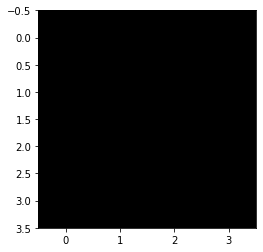

filter null weight [[-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]] 
bias [1.]


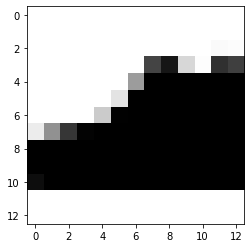

selected point 8 8
remaining 75 points total 784
new filter initialized, id =  1

combined training
 98/100 [============================>.] - ETA: 0s - loss: 3.5675new filter generated



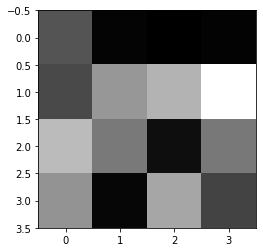

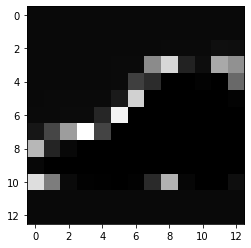

feature map min and max 2.619823e-25 0.9977754

filter weight [[0.8814311  0.83114684 0.82841086 0.83054966]
 [0.87528723 0.92312366 0.9404931  0.9886574 ]
 [0.9454687  0.904467   0.83756626 0.9040046 ]
 [0.92144305 0.83278424 0.93252075 0.8703656 ]] 
bias [-1.1228253]
selected point 6 11
remaining 62 points total 784
new filter initialized, id =  2

combined training
 98/100 [============================>.] - ETA: 0s - loss: 2.2342new filter generated



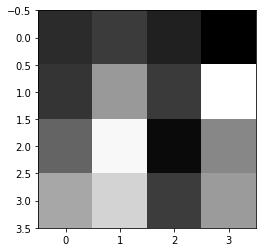

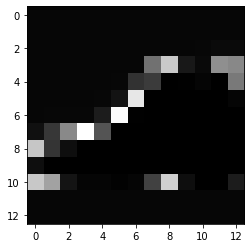

feature map min and max 8.0603054e-24 0.99845135

filter weight [[0.833476   0.84436864 0.8259976  0.80427635]
 [0.8401683  0.9077041  0.8438942  0.9763451 ]
 [0.8720158  0.97132933 0.8110662  0.89563036]
 [0.9170676  0.9470889  0.8451533  0.9087699 ]] 
bias [-1.2475643]
selected point 8 8
remaining 62 points total 784
new filter initialized, id =  3

combined training
 99/100 [============================>.] - ETA: 0s - loss: 1.3715new filter generated



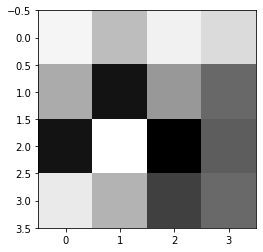

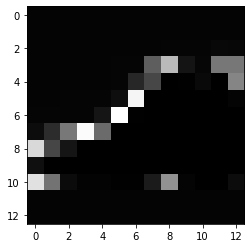

feature map min and max 1.778996e-24 0.99984837

filter weight [[0.97295636 0.9351718  0.970065   0.9555357 ]
 [0.9227022  0.8194803  0.91001    0.8773873 ]
 [0.8195303  0.9801439  0.8060382  0.869372  ]
 [0.9658181  0.9283696  0.8498619  0.87843305]] 
bias [-1.3386514]
selected point 6 7
remaining 61 points total 784
new filter initialized, id =  4

combined training
 99/100 [============================>.] - ETA: 0s - loss: 0.4786- ETA: 0s - lossnew filter generated



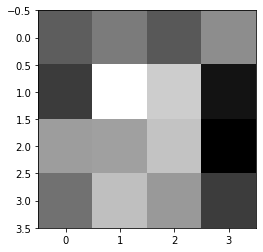

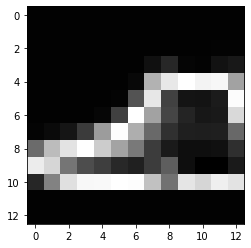

feature map min and max 0.0024088623 0.99867177

filter weight [[0.39921573 0.42993462 0.39429483 0.44932836]
 [0.36334285 0.5684242  0.5162096  0.3220103 ]
 [0.46624756 0.4689765  0.5063551  0.30183843]
 [0.42094693 0.50151163 0.46125513 0.36547226]] 
bias [-1.4622997]
selected point 6 9
remaining 28 points total 784
new filter initialized, id =  5

combined training
 99/100 [============================>.] - ETA: 0s - loss: 0.6613new filter generated



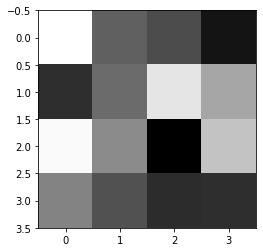

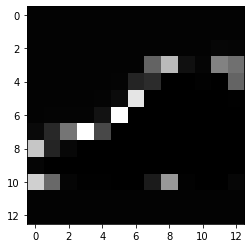

feature map min and max 8.400796e-30 0.9949569

filter weight [[1.0843058  0.961897   0.94719887 0.9042277 ]
 [0.92397684 0.9703986  1.0636524  1.0161387 ]
 [1.0802215  0.9953095  0.88830274 1.0386175 ]
 [0.9886061  0.9503919  0.9220188  0.9241191 ]] 
bias [-1.430164]
selected point 5 11
remaining 28 points total 784
new filter initialized, id =  6

combined training
 99/100 [============================>.] - ETA: 0s - loss: 0.5184new filter generated



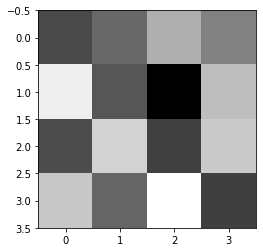

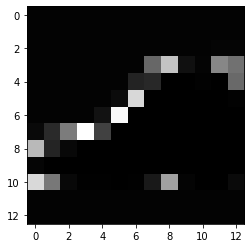

feature map min and max 1.8216652e-29 0.9999517

filter weight [[0.9286077  0.953288   1.0095354  0.9729819 ]
 [1.0597723  0.93916756 0.87059593 1.0212066 ]
 [0.93113977 1.0377632  0.92135644 1.0310118 ]
 [1.0284824  0.9507823  1.0731434  0.92046595]] 
bias [-1.4487715]
selected point 9 9
remaining 28 points total 784
new filter initialized, id =  7

combined training
 99/100 [============================>.] - ETA: 0s - loss: 0.5341new filter generated



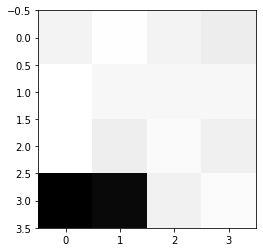

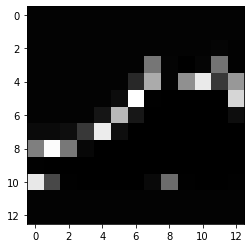

feature map min and max 1.25657464e-23 0.9995213

filter weight [[ 1.0452694   1.1267836   1.0339855   0.98827344]
 [ 1.130878    1.065716    1.0627475   1.0660952 ]
 [ 1.1363137   0.9902112   1.091441    1.0111696 ]
 [-0.9589961  -0.8786851   1.018006    1.1013504 ]] 
bias [-1.4575211]
selected point 9 9
Selected point is the same as last time, remaining 28 points
re-selected point 9 12
remaining 28 points total 784
new filter initialized, id =  8

combined training
 99/100 [============================>.] - ETA: 0s - loss: 0.4278new filter generated



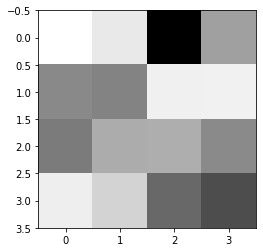

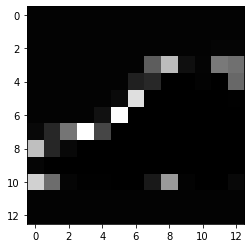

feature map min and max 8.651213e-30 0.99676824

filter weight [[1.036425   1.0231577  0.8879647  0.9809882 ]
 [0.96780944 0.96443665 1.0275252  1.0280361 ]
 [0.9596779  0.98787314 0.989415   0.96827316]
 [1.026439   1.0108528  0.9483071  0.93283004]] 
bias [-1.4668103]
selected point 8 10
remaining 28 points total 784
new filter initialized, id =  9

combined training
 51/100 [==============>...............] - ETA: 8s - loss: 0.4067 - ETA: 9s - loss: 

KeyboardInterrupt: 

In [5]:
#experiment on a graph for first layer generation
#new model
my_model = extensible_CNN_layer_multi_module()
image_x = test_images[0].reshape(1,28,28,1)
last_selected = [-1,-1]
filter_size = my_model.kernel_size
stride = my_model.stride

np.random.seed(0)
#feature_map_size = (np.shape(image_x)[1] - filter_size[0])//stride + 1
def generate_filter(image_x, model, threshold = 0.4): #last 0.2 for bell
    feature_map_size = (np.shape(image_x)[1] - filter_size[0])//stride + 1
    if len(model.filter_list) == 0:
        #add a filter for null input
        null_input = np.zeros((1,filter_size[0],filter_size[1],1))
        
        new_filter = model.add_filter(null_input[0], epochs = 100)
        #show
        #based on filter size, reshape
        plt.imshow(new_filter.get_weights()[0].reshape(filter_size[0],filter_size[1]), cmap='gray')
        plt.show()
        print("filter null weight",new_filter.get_weights()[0].reshape(filter_size[0],filter_size[1]),"\nbias", new_filter.get_weights()[1])
        #show the result on the image
        plt.imshow(new_filter(image_x)[0].numpy().reshape(feature_map_size, feature_map_size), cmap='gray')
        plt.show()
        
        

    #call the model and find the points that are inactivated
    feature_maps = model.call(image_x)
    #find the max of feature maps
    #sum_feature_maps = np.sum(feature_maps, axis = 3).reshape(np.shape(feature_maps)[1:-1])
    max_feature_maps = np.max(feature_maps, axis = 3).reshape(np.shape(feature_maps)[1:-1])
    #find the points that are inactivated
    inactive_points = np.where(max_feature_maps <= threshold)
    #print("inactive points", inactive_points)
    #randomly select a point
    #set seed
    if (len(inactive_points[0]) == 0):
        return
    
    point = np.random.randint(0, len(inactive_points[0]))
    
    selected = point#%2
    #selected = -1
    #selected = point 
    
    x = inactive_points[0][selected]
    y = inactive_points[1][selected]

    print("selected point", x, y)
    if (x == last_selected[0] and y == last_selected[1]):
        selected = -1
        x = inactive_points[0][selected]
        y = inactive_points[1][selected]
        print("Selected point is the same as last time, remaining", len(inactive_points[0]), "points")
        print("re-selected point", x, y)
    #print remaining and total
    print("remaining", len(inactive_points[0]), "points", "total", np.shape(image_x)[1]**2)
    
    last_selected[0] = x
    last_selected[1] = y
    #set the location to middle pixel

    #get the patch according to filter size and stride
    patch = image_x[0][x*stride:x*stride+filter_size[0], y*stride:y*stride+filter_size[1], 0].reshape(1,filter_size[0],filter_size[1],1).astype(np.float64)
    #patch = image_x[0][x:x+3,y:y+3,:].reshape(1,3,3,1).astype(np.float64)

    
    #add a filter for the patch
    new_filter = model.add_filter(patch[0], epochs = 100)
    #get feature map size according to filter size and stride
    feature_map_size = (np.shape(image_x)[1] - filter_size[0])//stride + 1
    feature_map_new_filter = new_filter(image_x)[0].numpy().reshape(feature_map_size,feature_map_size)
    print("new filter generated\n=============================================\n")
    plt.imshow(new_filter.get_weights()[0].reshape(filter_size[0], filter_size[1]), cmap='gray')
    plt.show()
    plt.imshow(feature_map_new_filter, cmap='gray')
    plt.show()
    print("feature map min and max", np.min(feature_map_new_filter), np.max(feature_map_new_filter))
    print("\nfilter weight",new_filter.get_weights()[0].reshape(filter_size[0],filter_size[1]),"\nbias", new_filter.get_weights()[1])
    
    return model

threshold = 0.4
if my_model.activation == "gaussian_bell":
    threshold = 0 #0.34 final -- 0.4 one layer
if my_model.activation == "sigmoid" or my_model.activation == "gaussian_bell_01":
    threshold = 0.5 #from 0.5 to 0.7, unstable

print("activation and threshold")
print(my_model.activation, threshold)
for i in range(20):
    generate_filter(image_x, my_model, threshold = threshold)

print(my_model.activation, len(my_model.filter_list))

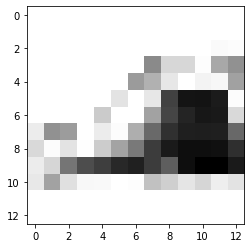

min 0.0024088623 max 1.0


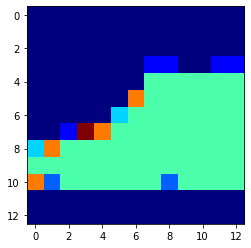

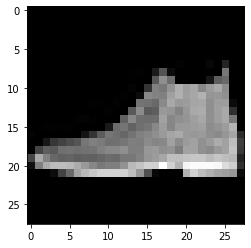

In [6]:
from plot_3d_matrix import plot_3D_matrix
#call the model
#and find the points that are inactivated
feature_maps = my_model.call(image_x)
#add feature maps together
mapping = np.max(feature_maps, axis = 3).reshape(np.shape(feature_maps)[1:-1])
plt.imshow(mapping, cmap='gray')
plt.show()
#get min max
print("min", np.min(mapping), "max", np.max(mapping))
#heat map
index_map = np.argmax(feature_maps, axis = 3).reshape(np.shape(feature_maps)[1:-1])
#with color for different filters
plt.imshow(index_map, cmap='jet')
plt.show()
#original image
plt.imshow(image_x[0].reshape(28,28), cmap='gray')
plt.show()



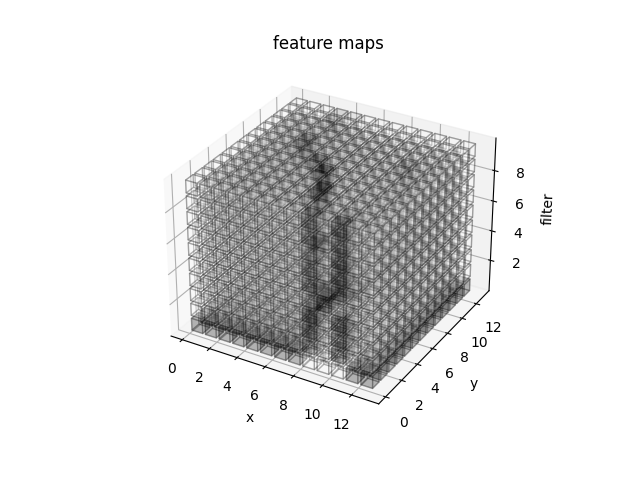

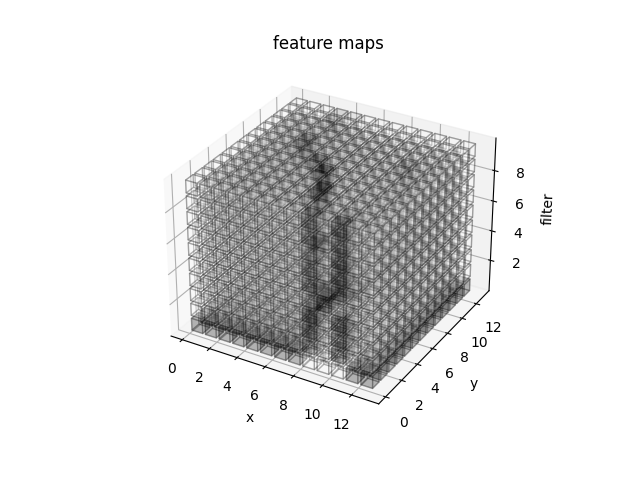

In [7]:
feature_maps = my_model.call(image_x)
feature_maps = feature_maps.numpy()
import matplotlib as mpl

%matplotlib widget
plot_3D_matrix(feature_maps[0], "feature maps", axis_labels=["x","y","filter"])
plt.show()


In [ ]:
%matplotlib inline

In [ ]:
plt.close()
new_image = test_images[1].reshape(1,28,28,1)
feature_maps = my_model.call(new_image)
#add feature maps together
mapping = np.max(feature_maps, axis = 3).reshape(np.shape(feature_maps)[1:-1])
plt.imshow(mapping, cmap='gray')
plt.show()
#get min max
print("min", np.min(mapping), "max", np.max(mapping))
plt.imshow(new_image[0].reshape(28,28), cmap='gray')


In [ ]:
#plot as heatmap
#according to index of the filter
index_map = np.argmax(feature_maps, axis = 3).reshape(np.shape(feature_maps)[1:-1])
#with color for different filters
plt.imshow(index_map, cmap='tab20')
plt.show()
#print the argmax map
print(index_map)

#print 8th feature map and filter
#print("8th feature map", feature_maps[0,:,:,8].numpy().reshape(26,26))
#get the filter index with most activation
#find in the index map after counting each idx appearance
filter_idx = np.argmax(np.bincount(index_map.reshape(-1)))
print("maxth filter", my_model.filter_list[filter_idx].get_weights()[0].reshape(filter_size[0],filter_size[1]),"\n", my_model.filter_list[filter_idx].get_weights()[1])
print("plots")
plt.imshow(feature_maps[0,:,:,filter_idx], cmap='gray')
plt.show()
plt.imshow(my_model.filter_list[filter_idx].get_weights()[0].reshape(filter_size[0],filter_size[1]), cmap='gray')
plt.show()

def show_heatmap_feature_maps(feature_maps):
    index_map = np.argmax(feature_maps, axis = 3).reshape(np.shape(feature_maps)[1:-1])
    plt.imshow(index_map, cmap='tab20')
    plt.show()

In [ ]:
#a transpose convolution layer for reconstruct image to test its validity
feature_map_size = len(my_model.filter_list)
#use a conv2d layer to reconstruct the image
decoder_layer = tf.keras.layers.Conv2DTranspose(1, (filter_size[0],filter_size[1]), strides=(stride, stride), padding='valid', activation='sigmoid')
#tf.keras.layers.Conv2DTranspose(1, (3,3), strides=(1,1), padding='valid', activation='relu')
#a multi layer decoder
#decoder_layer = tf.keras.Sequential([ tf.keras.layers.Conv2DTranspose(1, (3,3), strides=(1,1), padding='valid', activation='relu'), tf.keras.layers.Conv2DTranspose(1, (3,3), strides=(1,1), padding='same', activation='relu')])
feature_map_size_x = (np.shape(image_x)[1] - filter_size[0])//stride + 1
#inputs for the decoder
in_decoder = tf.keras.Input(shape=(feature_map_size_x,feature_map_size_x,feature_map_size))
#output a 28x28 image
output_decoder = decoder_layer(in_decoder)
print("decoder output shape", output_decoder.shape)
feature_maps_model = my_model.call(image_x)
print("feature maps shape", feature_maps_model.shape)
#send the feature maps to the decoder
out = decoder_layer(feature_maps_model)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
#train the decoder layer
epochs = 1000
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        #get the output of the decoder layer
        decoder_layer_output = decoder_layer(feature_maps_model)
        #get the loss
        loss = tf.reduce_mean(tf.square(decoder_layer_output - new_image))
    #get the gradients
    gradients = tape.gradient(loss, decoder_layer.trainable_variables)
    #update the weights
    optimizer.apply_gradients(zip(gradients, decoder_layer.trainable_variables))
    #print the loss
#print("epoch", epoch, "loss", loss.numpy())
#show the result
reconstruct_img = decoder_layer(feature_maps_model)
plt.imshow(reconstruct_img[0].numpy().reshape(28,28), cmap='gray')
plt.show()

In [ ]:
#use decoder on image 2
features_img2 = my_model.call(new_image)
reconstruct_img2 = decoder_layer(features_img2)

print("original image and reconstructed image comparison")
plt.imshow(new_image[0].reshape(28,28), cmap='gray')
plt.show()
plt.imshow(reconstruct_img2[0].numpy().reshape(28,28), cmap='gray')
plt.show()
print("image of shoe")

plt.imshow(image_x[0].reshape(28,28), cmap='gray')
plt.show()
plt.imshow(reconstruct_img[0].numpy().reshape(28,28), cmap='gray')
plt.show()

In [ ]:
#based on the obtained first layer conv momdel, apply max-pooling, then flatten it and use a dense layer to classify
#tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(1,1), padding='valid'),
backend_model = tf.keras.Sequential([ tf.keras.layers.Flatten(),tf.keras.layers.Dense(1024, activation = "sigmoid"), tf.keras.layers.Dense(512, activation = "sigmoid"), tf.keras.layers.Dense(512, activation = "sigmoid"), tf.keras.layers.Dense(10, activation='softmax')])
backend_model.compile(optimizer='adam', loss='MSE', metrics=['accuracy'])


def train_one_shot(sample_x, target_y):
    #call the model to get the feature maps
    feature_maps = tf.convert_to_tensor(my_model.call(sample_x).numpy().astype('float64'))
    #show the plotting of the feature maps
    #show_heatmap_feature_maps(feature_maps)
    target_y = tf.convert_to_tensor(target_y)
    #print(type(feature_maps))
    
    #fed the feature maps to the backend model
    
    
    backend_model.fit(feature_maps, target_y, epochs=1, verbose=0)
    #see the prediction
    #
    #print("prediction", backend_model.predict(feature_maps).argmax())
   
#image_label_0_idx = np.where(train_labels == 0)[0]
#image_x_0 = train_images[image_label_0_idx][0].reshape(1,28,28,1).astype('float64')
#image_y_0 = train_labels[image_label_0_idx][0]
#one_hot_y_0 = tf.one_hot(image_y_0, 10).numpy().reshape(1,10)
#train_one_shot(image_x_0, one_hot_y_0)
    
#loop in labels and train the model
images_x_0_9 = []
images_y_0_9 = []

n_shot = 1
for label_idx in range(10):
    for i in range(n_shot):
        image_label_i = np.where(train_labels == label_idx)[0]
        image_x_i = train_images[image_label_i][i].reshape(1,28,28,1).astype('float64')
        image_y_i = label_idx
        one_hot_y_i = tf.one_hot(image_y_i, 10).numpy().reshape(1,10)
        #train_one_shot(image_x_i, one_hot_y_i)
        images_x_0_9.append(image_x_i)
        images_y_0_9.append(one_hot_y_i)
    
print(len(images_x_0_9))



In [ ]:
#train with a batch of 0-9 images
batch = 0
for epoch in tqdm.tqdm(range(20*n_shot)):
    for batch in range(n_shot): #training all the classes for one round is necessary, to avoid unbalanced training and overfitting
        
        for i in range(0, len(images_x_0_9), n_shot):
            #print(i + batch)
            train_one_shot(images_x_0_9[i + batch], images_y_0_9[i + batch])

    #train_one_shot(images_x_0_9, images_y_0_9)
    


In [ ]:
#show the heatmap of 10 images
#show 20 images
figure = plt.figure(figsize=(20, 20))

'''
for i in range(10):
    feature_maps = tf.convert_to_tensor(my_model.call(images_x_0_9[i]).numpy().astype('float64'))
    show_heatmap_feature_maps(feature_maps)
    #plot original image
    plt.imshow(images_x_0_9[i].reshape(28,28), cmap='gray')
    plt.show()
    print("prediction", backend_model.predict(feature_maps).argmax())
    print("ground truth", images_y_0_9[i].argmax())
'''

#show the heatmap of 10 images and 10 original images
#5 images one row
correct = 0
for i in range(len(images_x_0_9)):
    feature_maps = tf.convert_to_tensor(my_model.call(images_x_0_9[i]).numpy().astype('float64'))
    #show_heatmap_feature_maps(feature_maps)
    #plot original image
    
    plt.subplot((len(images_x_0_9) * 2) // 5, 5, i+1 + (i // 5) * 5)
    plt.imshow(images_x_0_9[i].reshape(28,28), cmap='gray')
    plt.title("pred: " + str(backend_model.predict(feature_maps).argmax()) + " truth: " + str(images_y_0_9[i].argmax()))
    plt.subplot((len(images_x_0_9) * 2) // 5, 5, i+6 + (i // 5) * 5)
    index_map = np.argmax(feature_maps, axis = 3).reshape(np.shape(feature_maps)[1:-1])
    plt.imshow(index_map, cmap='tab20')
    correct += (backend_model.predict(feature_maps).argmax() == images_y_0_9[i].argmax())
plt.show()

print("accuracy", correct / len(images_x_0_9))


In [ ]:
#show the results
for i in range(10):
    feature_maps = tf.convert_to_tensor(my_model.call(images_x_0_9[i]).numpy().astype('float64'))
    print("prediction", backend_model.predict(feature_maps))
    print("prediction", backend_model.predict(feature_maps).argmax())

In [ ]:
#evaluate the model on the test set

def evaluation(my_model, backend_model):
    confusion_matrix = [[0 for i in range(10)] for j in range(10)]
    
    for i in tqdm.tqdm(range(test_images.shape[0])):
        feature_maps = tf.convert_to_tensor(my_model.call(test_images[i].reshape(1,28,28,1).astype('float64')).numpy().astype('float64'))
        prediction = int(backend_model.predict(feature_maps).argmax())
        
        confusion_matrix[int(test_labels[i])][prediction] += 1
    return confusion_matrix

conf_mat = evaluation(my_model, backend_model)

#show the confusion matrix
plt.imshow(conf_mat, cmap='gray')
plt.show()

In [ ]:
#show the accuracy
print("accuracy", np.trace(conf_mat)/np.sum(conf_mat))

In [ ]:
#show best classified and worst classified
best_classified = np.argmax(np.diag(conf_mat))
worst_classified = np.argmin(np.diag(conf_mat))
print("best classified", best_classified)
print("worst classified", worst_classified)

In [ ]:
#plot images of best classified and worst classified
plt.imshow(test_images[np.where(test_labels == best_classified)[0][0]].reshape(28,28), cmap='gray')
plt.show()
plt.imshow(test_images[np.where(test_labels == worst_classified)[0][0]].reshape(28,28), cmap='gray')
plt.show()
#print shape of the feature maps
print(my_model.call(images_x_0_9[0]).shape)

In [ ]:
#show the index map of best classified
show_heatmap_feature_maps(my_model.call(test_images[np.where(test_labels == best_classified)[0][0]].reshape(1,28,28,1)))
#show the index map of worst classified
show_heatmap_feature_maps(my_model.call(test_images[np.where(test_labels == worst_classified)[0][0]].reshape(1,28,28,1)))